Loading required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

/tmp/ipykernel_5105/1311153977.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Data From CSV File  

In [2]:
df = pd.read_csv('Raisin.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df["Eccentricity"].shape

(900,)

Visualizing the data

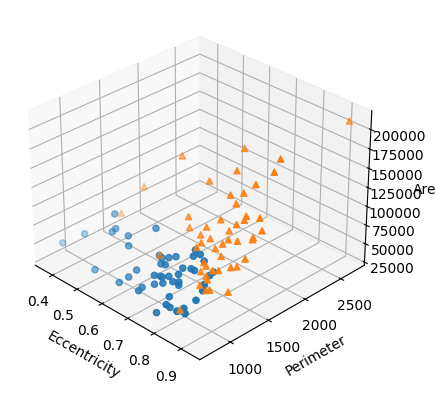

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

c1 = df[df['Class'] == "Kecimen"][0:50]
c2 = df[df['Class'] == "Besni"][0:50]

ax.scatter(c1['Eccentricity'], c1['Perimeter'], c1["Area"], marker='o')
ax.scatter(c2['Eccentricity'], c2['Perimeter'], c2["Area"], marker="^")

ax.set_xlabel('Eccentricity')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Area')
ax.view_init(30, -45)
plt.show()



### Feature set


In [7]:
X = df.drop('Class', axis=1) .values  #.astype(float)
X[0:5]


array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, 8.01805234e-01,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, 7.98353619e-01,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       [4.59280000e+04, 2.86540559e+02, 2.08760042e+02, 6.84989217e-01,
        4.73360000e+04, 6.99599385e-01, 8.44162000e+02],
       [7.94080000e+04, 3.52190770e+02, 2.90827533e+02, 5.64011330e-01,
        8.14630000e+04, 7.92771926e-01, 1.07325100e+03]])

In [8]:
Y = df['Class'].values
Y[0:5]

array(['Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen'],
      dtype=object)

### Preprocessing Data


Since the target column is not in numerical form we are converting the data

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Train Test Split  

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (630, 7) (630,)
Test set: (270, 7) (270,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>Support Vector Machine (SVM)</h3>


#### Import library 


In [11]:
from sklearn.svm import SVC

In [12]:
#Train Model and Predict  
svc = SVC(kernel='linear').fit(X_train,y_train)
svc

SVC(kernel='linear')

### Predicting
We can use the model to make predictions on the test set:


In [13]:
yhat = svc.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 1])

The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0 for 2D featureset.

In [14]:
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]

x,y = np.meshgrid(np.linspace(-200,400,1000),np.linspace(0,1000,2000))


z(x,y)

array([[-241.90613943, -241.90403691, -241.90193438, ..., -239.80992184,
        -239.80781931, -239.80571679],
       [-242.05454632, -242.0524438 , -242.05034127, ..., -239.95832872,
        -239.9562262 , -239.95412367],
       [-242.20295321, -242.20085068, -242.19874816, ..., -240.10673561,
        -240.10463309, -240.10253056],
       ...,
       [-538.27469336, -538.27259083, -538.27048831, ..., -536.17847576,
        -536.17637324, -536.17427071],
       [-538.42310025, -538.42099772, -538.4188952 , ..., -536.32688265,
        -536.32478012, -536.3226776 ],
       [-538.57150713, -538.56940461, -538.56730208, ..., -536.47528954,
        -536.47318701, -536.47108449]])

### Evaluation

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svc.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8523809523809524
Test set Accuracy:  0.8518518518518519


Confusion Matrix

In [16]:
print("Training Confusion Matrix:\n", metrics.confusion_matrix(y_train, svc.predict(X_train)))
print("Testing Confusion Matrix:\n", metrics.confusion_matrix(y_test, yhat))

Training Confusion Matrix:
 [[281  35]
 [ 58 256]]
Testing Confusion Matrix:
 [[119  15]
 [ 25 111]]


Reversing Label Encoding

In [17]:
y_test_cat = le.inverse_transform(y_test)
yhat_cat = le.inverse_transform(yhat)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test_cat, yhat_cat))

              precision    recall  f1-score   support

       Besni       0.83      0.89      0.86       134
     Kecimen       0.88      0.82      0.85       136

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270



Model has an accuracy of 85.23%

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, yhat)

Text(0, 0.5, 'True Positive Rate')

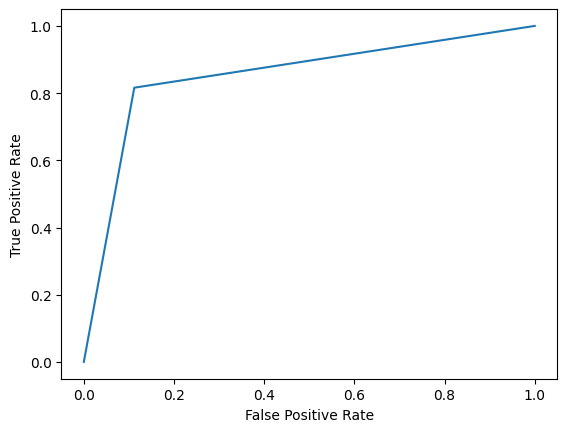

In [21]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [22]:
roc_auc_score(y_test, yhat)

0.8521180860403863